In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# __1 - Business Problem__  
___PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS___  

# __2 - Data collection and description__ 

In [4]:
dataset = pd.read_csv('forestfires.csv')

since we have encoded form of columns 'month' and 'day',so we can drop both columns

In [5]:
dataset.drop(["month","day"],axis=1,inplace = True)

In [6]:
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
dataset["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
dataset.shape

(517, 29)

- dataset has 517 rows and 31 columns

In [9]:
dataset.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

There are no null value in our dataset

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


- describe function shows only numerical columns information,Lets check outliers with the help of boxplot
The features are not on the same scale. For example wind has a mean of 4 while DC has a mean value of 547. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

- No Missing values and datatype also identified accuretly

In [31]:
# checking unique category in each column of dataset
dataset.nunique()

FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

- After checking the first rows of data, we know the following about the features "size_category" :

They are categorical attributes (object).

They have repetitive values.

They have several categories.

And about All other features :

They are Numeriacal attributes (int64 & fload64).

They have contineous values.

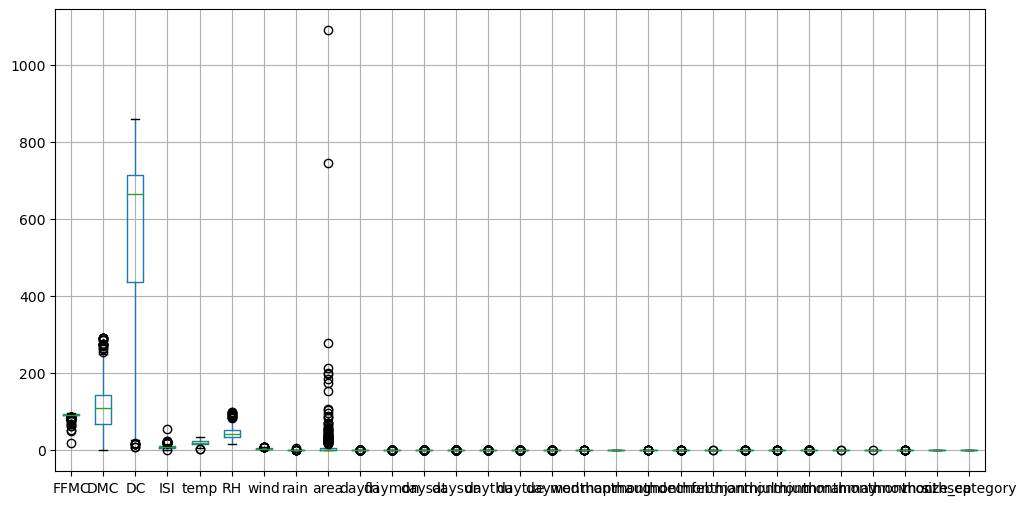

In [32]:
plt.figure(figsize=(12,6))
dataset.boxplot()
plt.show();

- From the box plot we can see that there are so many outliers,Lets treat one by one

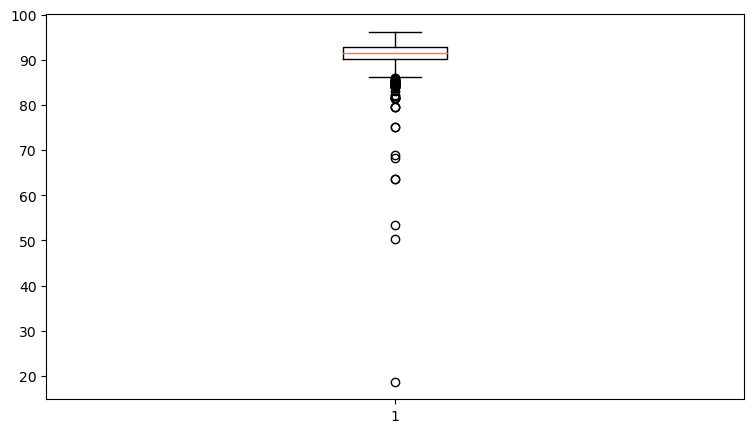

In [34]:
box=plt.boxplot(dataset['FFMC'])
plt.show();

- In above box plot , Distribution of data is not normal, its left skewed with so many outliers.we cant drop outliers directly that can drop lots of other information along with it too,so instead of droping all of that outliers we use Winsorization/capping techqniue to replace this outliers value with lower limit value because outliers are in lower limit.

- using winsorization with percentile method :-In winsorization above 95 percentile and below 5 percentile are treated as outliers

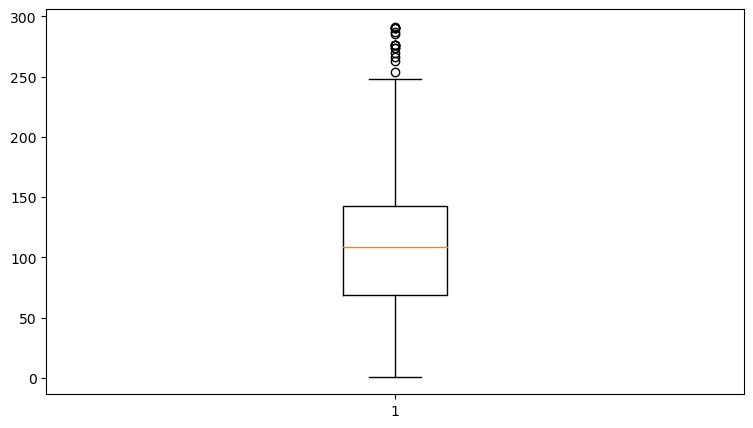

In [35]:
box1=plt.boxplot(dataset['DMC'])
plt.show();

- DMC distribution has majority data in 55 to 150 range with right skewed and has outliers

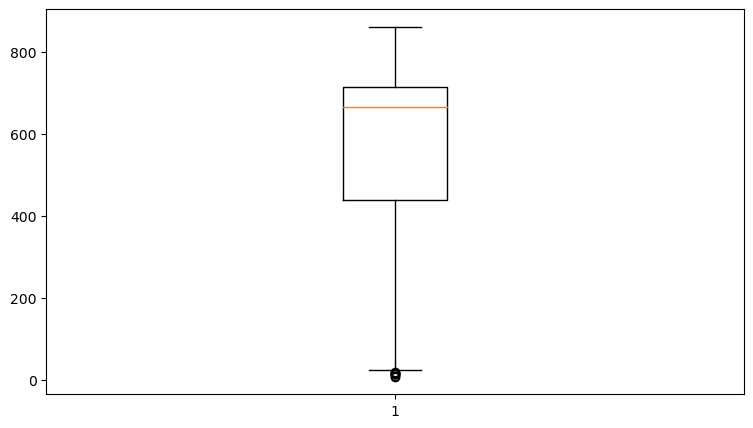

In [36]:
box2=plt.boxplot(dataset['DC'])
plt.show();

- DC distribution has majority data in around  450 to 700 range with left skewed and has outliers at lower limit

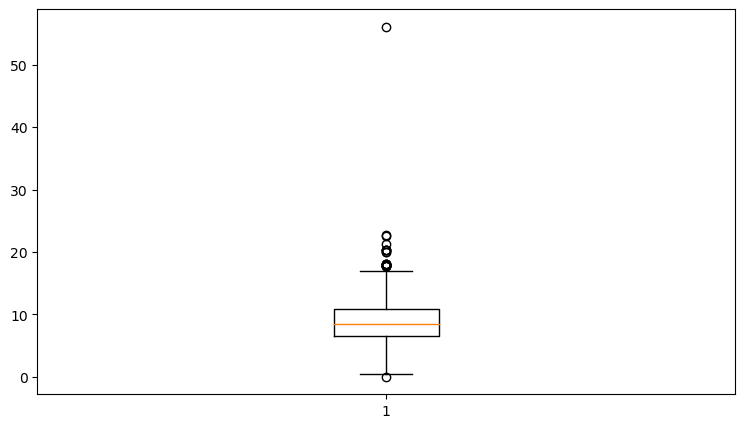

In [37]:
box3=plt.boxplot(dataset['ISI'])
plt.show();

- ISI distribution has majority data in 5 to 10 range outliers on both sides

- here one outlier  is too far from distribution so we drop that outlier and for other outlier we use winsorization

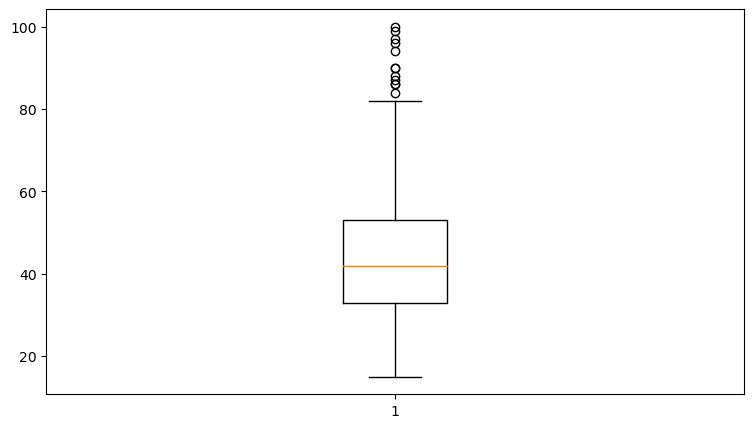

In [38]:
box6=plt.boxplot(dataset['RH'])
plt.show();

- RH distribution has majority data in around 30 to 50 range with right skewed and has outliers at upper limit

# Outlier Check

C:\Users\Yash Shinde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


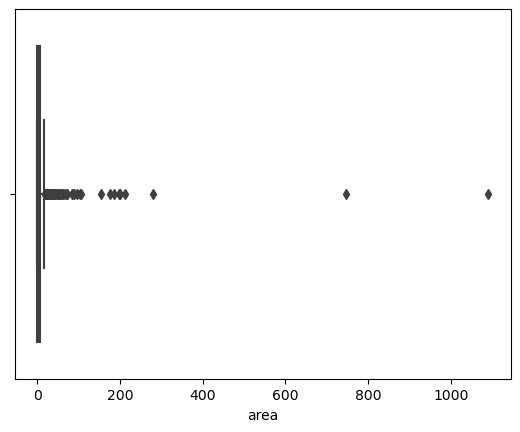

In [11]:
ax = sns.boxplot(dataset['area'])

### There are 3 Outlier instances in our dataset

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


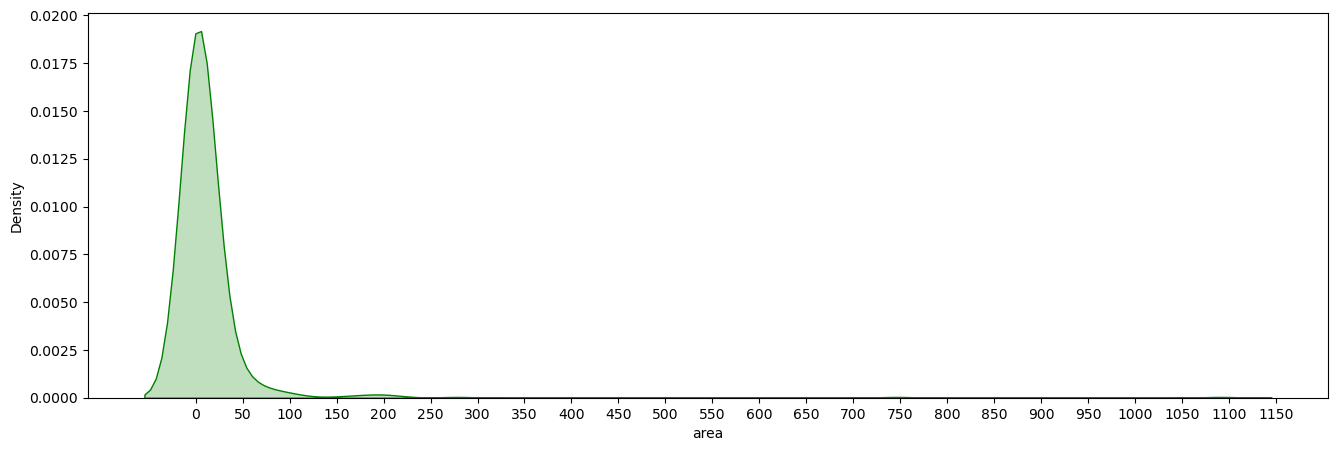

In [12]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(dataset['area'].skew()))
print("Kurtosis: {}".format(dataset['area'].kurtosis()))
ax = sns.kdeplot(dataset['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### The Data is highly skewed and has large kurtosis value  
#### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

<AxesSubplot:>

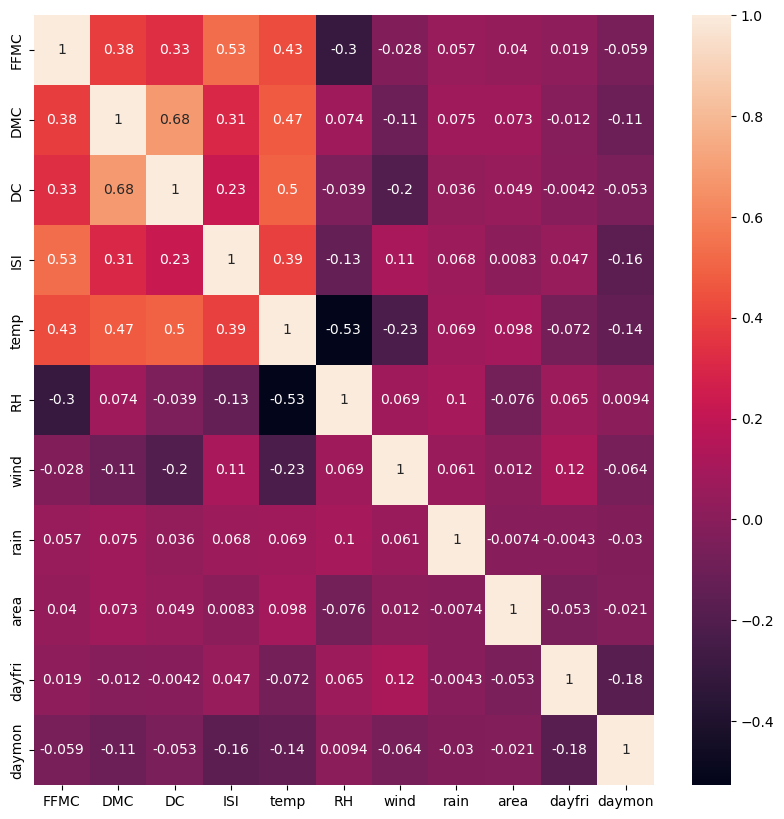

In [13]:
corr = dataset[dataset.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Neural Network Model

### Encoding categorical data

Label Encoding the "size_category" column

In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['size_category']=label_encoder.fit_transform(dataset['size_category'])

### Splitting the dataset into the Training set and Test set

In [15]:
X = dataset.iloc[:,0:28].values
y = dataset.iloc[:,28].values

In [16]:
X

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

### Feature Scaling

In [17]:
def norm_func(i):
    X = (i-i.min())/(i.max()-i.min())
    return (X)
X = norm_func(X)
X

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Part 1 - Building the ANN

### Initializing the ANN

In [19]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=12,input_dim = 28, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
for l in ann.layers:
    print (l.output_shape)

(None, 12)
(None, 8)
(None, 1)


# Part 2 - Training the ANN

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [23]:
ann.fit(X_train, y_train, batch_size = 30, epochs = 150,)

Epoch 1/150
14/14 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.6223
Epoch 2/150
14/14 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.7385
Epoch 3/150
14/14 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7361
Epoch 4/150
14/14 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7361
Epoch 5/150
14/14 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7361
Epoch 6/150
14/14 [==============================] - 0s 184us/step - loss: 0.6157 - accuracy: 0.7361
Epoch 7/150
14/14 [==============================] - 0s 105us/step - loss: 0.6035 - accuracy: 0.7361
Epoch 8/150
14/14 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7361
Epoch 9/150
14/14 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7361
Epoch 10/150
14/14 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7361
Epoch

14/14 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8232
Epoch 83/150
14/14 [==============================] - 0s 997us/step - loss: 0.3873 - accuracy: 0.8257
Epoch 84/150
14/14 [==============================] - 0s 982us/step - loss: 0.3840 - accuracy: 0.8305
Epoch 85/150
14/14 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8281
Epoch 86/150
14/14 [==============================] - 0s 291us/step - loss: 0.3775 - accuracy: 0.8329
Epoch 87/150
14/14 [==============================] - 0s 100us/step - loss: 0.3751 - accuracy: 0.8329
Epoch 88/150
14/14 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8281
Epoch 89/150
14/14 [==============================] - 0s 813us/step - loss: 0.3682 - accuracy: 0.8329
Epoch 90/150
14/14 [==============================] - 0s 719us/step - loss: 0.3648 - accuracy: 0.8329
Epoch 91/150
14/14 [==============================] - 0s 193us/step - loss: 0.3635 - accuracy: 0.8402

In [24]:
y_pred = ann.predict(X_train)

In [25]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                348       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


# __3 - Conclusion__ 

In [26]:
test_score=ann.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9038
